In [1]:
import matplotlib.pyplot as plt
import numpy as np
from clusters.ammonia import Ammonia
from systems_vde import systems
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

In [2]:
# MP2

In [3]:
def vde_mp2(sys):
    frames, electron, neutral = np.loadtxt(systems[sys].mp2, delimiter=',', unpack=True)

    VDE = []
    for index, frame in enumerate(frames):
        VDE.append((electron[index] - neutral[index]) * 27.211324570273)
    
    return VDE

In [4]:
ammonia_2 = vde_mp2(21)
ammonia_2.extend(vde_mp2(22))
ammonia_2_max = max(ammonia_2)


ammonia_3 = vde_mp2(34)
ammonia_3_max = max(ammonia_3)



ammonia_4 = vde_mp2(41)
ammonia_4.extend(vde_mp2(42))
ammonia_4.extend(vde_mp2(44))
ammonia_4_max = max(ammonia_4)

ammonia_5 = vde_mp2(51)
ammonia_5.extend(vde_mp2(54))
ammonia_5_max = max(ammonia_5)

ammonia_6 = vde_mp2(62)
ammonia_6_max = max(ammonia_6)

ammonia_7 = vde_mp2(71)
ammonia_7_max = max(ammonia_7)

ammonia_8 = vde_mp2(81)
ammonia_8.extend(vde_mp2(82))
ammonia_8.extend(vde_mp2(83))
ammonia_8_max = max(ammonia_8)




systems_mp2 = {'2 ammonia': [ammonia_2, "blue", ammonia_2_max],
               '3 ammonia': [ammonia_3, "red", ammonia_3_max],
               '4 ammonia': [ammonia_4, "green", ammonia_4_max],
               '5 ammonia': [ammonia_5, "indigo", ammonia_5_max],
               '6 ammonia': [ammonia_6, "purple", ammonia_6_max],
               '7 ammonia': [ammonia_7, "lime", ammonia_7_max],
               '8 ammonia': [ammonia_8, "orange", ammonia_8_max],}


for i in systems_mp2.keys():
    data = systems_mp2[i][0]
    
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 10000)
    kde_values = kde(x_values)
    peaks, _ = find_peaks(kde_values)
    
    kde_max = []
    for peak in peaks:
        values = [kde_values[peak], x_values[peak]]
        kde_max.append(values)
        
    max_peak = max(kde_max)

    systems_mp2[i].append(max_peak)


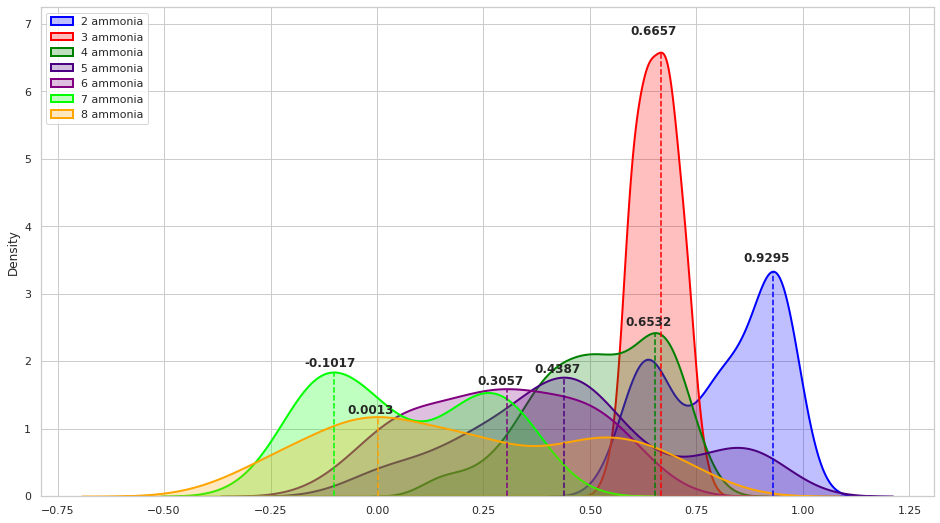

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

for i in systems_mp2.keys():
    sns.kdeplot(data=systems_mp2[i][0], fill=True, lw=2, label=i, color=systems_mp2[i][1])
    
    x = [systems_mp2[i][3][1], systems_mp2[i][3][1]]
    y = [0, systems_mp2[i][3][0]]
    
    plt.plot(x,y, color=systems_mp2[i][1], linestyle='--')
    
    plt.text(systems_mp2[i][3][1] - 0.07, systems_mp2[i][3][0] * 1.04, f'{systems_mp2[i][3][1]:.4f}', fontweight='bold')

plt.ylim(0, 7.25)
plt.legend(loc='upper left')
plt.show()

In [6]:
# B3LYP

In [7]:
def vde_b3lyp(sys):
    frames, electron, neutral = np.loadtxt(systems[sys].b3lyp, delimiter=',', unpack=True)

    VDE = []
    for index, frame in enumerate(frames):
        VDE.append((electron[index] - neutral[index]) * 27.211324570273)
    
    return VDE

In [8]:
ammonia_2 = vde_b3lyp(21)
ammonia_2.extend(vde_b3lyp(22))
ammonia_2_max = max(ammonia_2)


ammonia_3 = vde_b3lyp(34)
ammonia_3_max = max(ammonia_3)



ammonia_4 = vde_b3lyp(41)
ammonia_4.extend(vde_b3lyp(42))
ammonia_4.extend(vde_b3lyp(44))
ammonia_4_max = max(ammonia_4)

ammonia_5 = vde_b3lyp(51)
ammonia_5.extend(vde_b3lyp(54))
ammonia_5_max = max(ammonia_5)

ammonia_6 = vde_b3lyp(62)
ammonia_6_max = max(ammonia_6)

ammonia_7 = vde_b3lyp(71)
ammonia_7_max = max(ammonia_7)

ammonia_8 = vde_b3lyp(81)
ammonia_8.extend(vde_b3lyp(82))
ammonia_8.extend(vde_b3lyp(83))
ammonia_8_max = max(ammonia_8)




systems_b3lyp = {'2 ammonia': [ammonia_2, "blue", ammonia_2_max],
               '3 ammonia': [ammonia_3, "red", ammonia_3_max],
               '4 ammonia': [ammonia_4, "green", ammonia_4_max],
               '5 ammonia': [ammonia_5, "indigo", ammonia_5_max],
               '6 ammonia': [ammonia_6, "purple", ammonia_6_max],
               '7 ammonia': [ammonia_7, "lime", ammonia_7_max],
               '8 ammonia': [ammonia_8, "orange", ammonia_8_max],}


for i in systems_b3lyp.keys():
    data = systems_b3lyp[i][0]
    
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 10000)
    kde_values = kde(x_values)
    peaks, _ = find_peaks(kde_values)
    
    kde_max = []
    for peak in peaks:
        values = [kde_values[peak], x_values[peak]]
        kde_max.append(values)
        
    max_peak = max(kde_max)

    systems_b3lyp[i].append(max_peak)

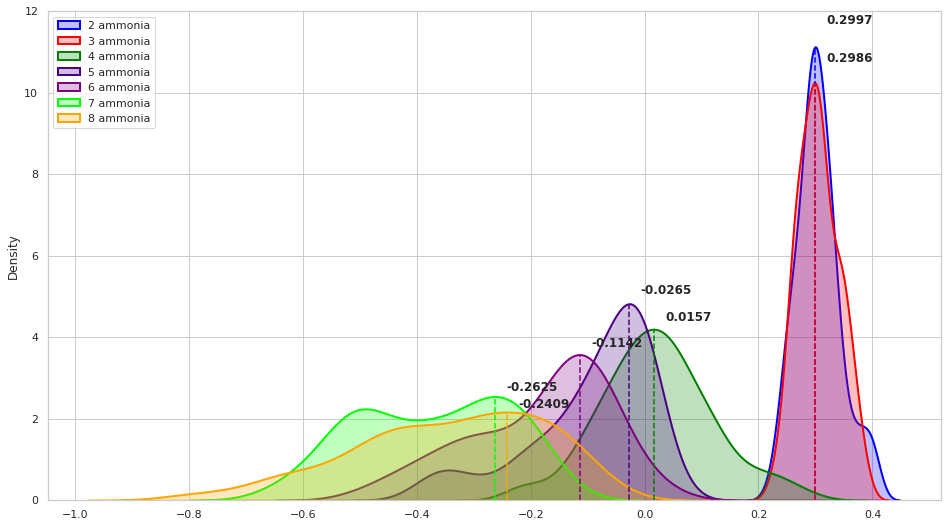

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

for i in systems_b3lyp.keys():
    sns.kdeplot(data=systems_b3lyp[i][0], fill=True, lw=2, label=i, color=systems_b3lyp[i][1])
    
    x = [systems_b3lyp[i][3][1], systems_b3lyp[i][3][1]]
    y = [0, systems_b3lyp[i][3][0]]
    
    plt.plot(x,y, color=systems_b3lyp[i][1], linestyle='--')
    
    plt.text(systems_b3lyp[i][3][1] + 0.02, systems_b3lyp[i][3][0] * 1.05, f'{systems_b3lyp[i][3][1]:.4f}', fontweight='bold')

plt.ylim(0, 12)
plt.legend(loc='upper left')
plt.show()

In [10]:
# zvlast B3LYP

In [11]:
def vde_b3lyp(sys):
    frames, electron, neutral = np.loadtxt(systems[sys].b3lyp, delimiter=',', unpack=True)

    VDE = []
    for index, frame in enumerate(frames):
        VDE.append((electron[index] - neutral[index]) * 27.211324570273)
    
    return VDE

In [12]:
ammonia_21 = vde_b3lyp(21)
ammonia_22 = vde_b3lyp(22)

ammonia_21_max = max(ammonia_21)
ammonia_22_max = max(ammonia_22)

ammonia_34 = vde_b3lyp(34)
ammonia_34_max = max(ammonia_34)



ammonia_41 = vde_b3lyp(41)
ammonia_42 = vde_b3lyp(42)
ammonia_44 = vde_b3lyp(44)

ammonia_41_max = max(ammonia_41)
ammonia_42_max = max(ammonia_42)
ammonia_44_max = max(ammonia_44)

ammonia_51 = vde_b3lyp(51)
ammonia_54 = vde_b3lyp(54)

ammonia_51_max = max(ammonia_51)
ammonia_54_max = max(ammonia_54)

ammonia_62 = vde_b3lyp(62)
ammonia_62_max = max(ammonia_62)

ammonia_71 = vde_b3lyp(71)
ammonia_71_max = max(ammonia_71)

ammonia_81 = vde_b3lyp(81)
ammonia_82 = vde_b3lyp(82)
ammonia_83 = vde_b3lyp(83)

ammonia_81_max = max(ammonia_81)
ammonia_82_max = max(ammonia_82)
ammonia_83_max = max(ammonia_83)



systems_b3lyp = {'21 ammonia': [ammonia_21, "blue", ammonia_21_max],
                 '22 ammonia': [ammonia_22, "blue", ammonia_22_max],
                 '34 ammonia': [ammonia_34, "red", ammonia_34_max],
                 '41 ammonia': [ammonia_41, "green", ammonia_41_max],
                 '42 ammonia': [ammonia_42, "green", ammonia_42_max],
                 '44 ammonia': [ammonia_44, "green", ammonia_44_max],
                 '51 ammonia': [ammonia_51, "indigo", ammonia_51_max],
                 '54 ammonia': [ammonia_54, "indigo", ammonia_54_max],
                 '62 ammonia': [ammonia_62, "purple", ammonia_62_max],
                 '71 ammonia': [ammonia_71, "lime", ammonia_71_max],
                 '81 ammonia': [ammonia_81, "orange", ammonia_81_max],
                 '82 ammonia': [ammonia_82, "orange", ammonia_82_max],
                 '83 ammonia': [ammonia_83, "orange", ammonia_83_max],}


for i in systems_b3lyp.keys():
    data = systems_b3lyp[i][0]
    
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 10000)
    kde_values = kde(x_values)
    peaks, _ = find_peaks(kde_values)
    
    kde_max = []
    for peak in peaks:
        values = [kde_values[peak], x_values[peak]]
        kde_max.append(values)
        
    max_peak = max(kde_max)

    systems_b3lyp[i].append(max_peak)

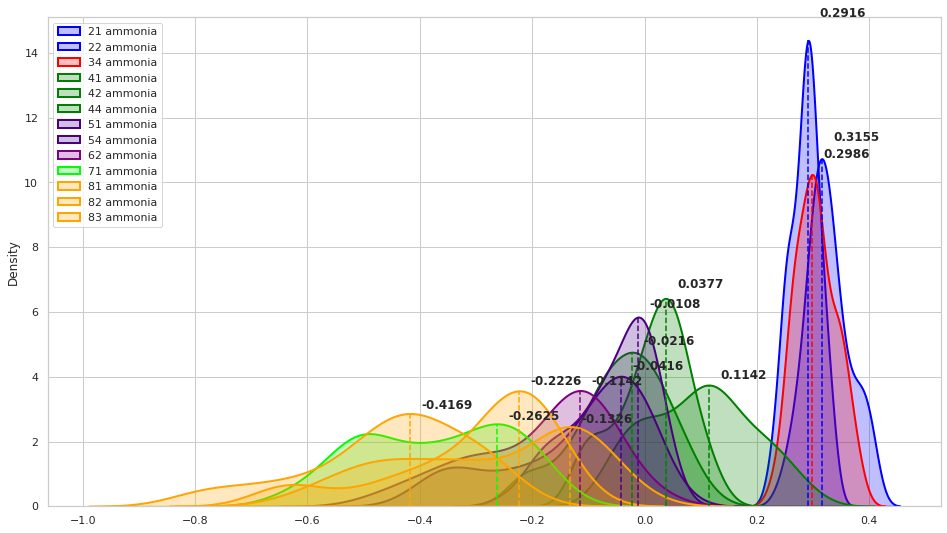

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

for i in systems_b3lyp.keys():
    sns.kdeplot(data=systems_b3lyp[i][0], fill=True, lw=2, label=i, color=systems_b3lyp[i][1])
    
    x = [systems_b3lyp[i][3][1], systems_b3lyp[i][3][1]]
    y = [0, systems_b3lyp[i][3][0]]
    
    plt.plot(x,y, color=systems_b3lyp[i][1], linestyle='--')
    
    plt.text(systems_b3lyp[i][3][1] + 0.02, systems_b3lyp[i][3][0] * 1.05, f'{systems_b3lyp[i][3][1]:.4f}', fontweight='bold')

# plt.ylim(0, 12)
plt.legend(loc='upper left')
plt.show()

In [14]:
# zvlast mp2

In [15]:
def vde_mp2(sys):
    frames, electron, neutral = np.loadtxt(systems[sys].mp2, delimiter=',', unpack=True)

    VDE = []
    for index, frame in enumerate(frames):
        VDE.append((electron[index] - neutral[index]) * 27.211324570273)
    
    return VDE

In [16]:
ammonia_21 = vde_mp2(21)
ammonia_22 = vde_mp2(22)

ammonia_21_max = max(ammonia_21)
ammonia_22_max = max(ammonia_22)

ammonia_34 = vde_mp2(34)
ammonia_34_max = max(ammonia_34)



ammonia_41 = vde_mp2(41)
ammonia_42 = vde_mp2(42)
ammonia_44 = vde_mp2(44)

ammonia_41_max = max(ammonia_41)
ammonia_42_max = max(ammonia_42)
ammonia_44_max = max(ammonia_44)

ammonia_51 = vde_mp2(51)
ammonia_54 = vde_mp2(54)

ammonia_51_max = max(ammonia_51)
ammonia_54_max = max(ammonia_54)

ammonia_62 = vde_mp2(62)
ammonia_62_max = max(ammonia_62)

ammonia_71 = vde_mp2(71)
ammonia_71_max = max(ammonia_71)

ammonia_81 = vde_mp2(81)
ammonia_82 = vde_mp2(82)
ammonia_83 = vde_mp2(83)

ammonia_81_max = max(ammonia_81)
ammonia_82_max = max(ammonia_82)
ammonia_83_max = max(ammonia_83)



systems_mp2 = {'21 ammonia': [ammonia_21, "blue", ammonia_21_max],
                 '22 ammonia': [ammonia_22, "blue", ammonia_22_max],
                 '34 ammonia': [ammonia_34, "red", ammonia_34_max],
                 '41 ammonia': [ammonia_41, "green", ammonia_41_max],
                 '42 ammonia': [ammonia_42, "green", ammonia_42_max],
                 '44 ammonia': [ammonia_44, "green", ammonia_44_max],
                 '51 ammonia': [ammonia_51, "indigo", ammonia_51_max],
                 '54 ammonia': [ammonia_54, "indigo", ammonia_54_max],
                 '62 ammonia': [ammonia_62, "purple", ammonia_62_max],
                 '71 ammonia': [ammonia_71, "lime", ammonia_71_max],
                 '81 ammonia': [ammonia_81, "orange", ammonia_81_max],
                 '82 ammonia': [ammonia_82, "orange", ammonia_82_max],
                 '83 ammonia': [ammonia_83, "orange", ammonia_83_max],}


for i in systems_mp2.keys():
    data = systems_mp2[i][0]
    
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 10000)
    kde_values = kde(x_values)
    peaks, _ = find_peaks(kde_values)
    
    kde_max = []
    for peak in peaks:
        values = [kde_values[peak], x_values[peak]]
        kde_max.append(values)
        
    max_peak = max(kde_max)

    systems_mp2[i].append(max_peak)

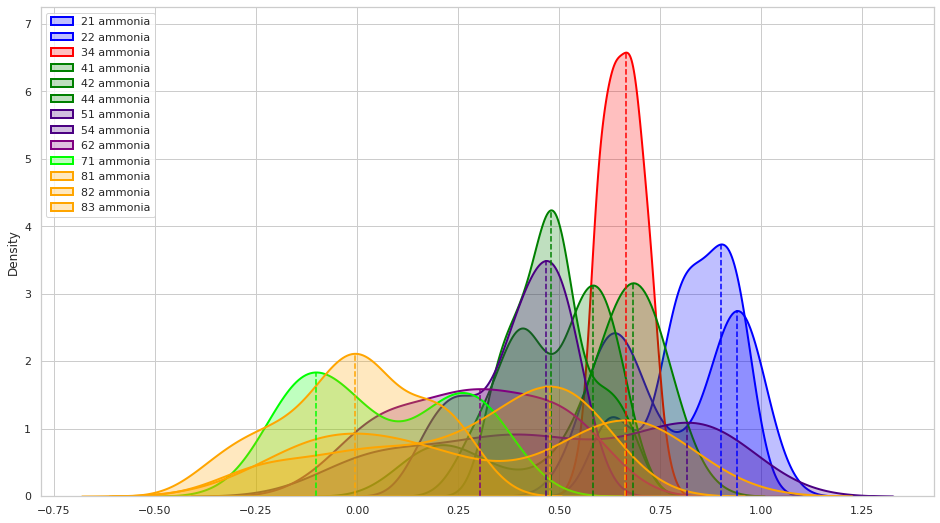

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

for i in systems_mp2.keys():
    sns.kdeplot(data=systems_mp2[i][0], fill=True, lw=2, label=i, color=systems_mp2[i][1])
    
    x = [systems_mp2[i][3][1], systems_mp2[i][3][1]]
    y = [0, systems_mp2[i][3][0]]
    
    plt.plot(x,y, color=systems_mp2[i][1], linestyle='--')
    
#     plt.text(systems_mp2[i][3][1] - 0.07, systems_mp2[i][3][0] * 1.04, f'{systems_mp2[i][3][1]:.4f} eV', fontweight='bold')

plt.ylim(0, 7.25)
plt.legend(loc='upper left')
plt.show()

In [18]:
    # frames, electron, neutral = np.loadtxt(systems[sys].b3lyp, delimiter=',', unpack=True)
    # 
    # VDE = []
    # for index, frame in enumerate(frames):
    #     VDE.append((electron[index] - neutral[index]) * 27.211324570273)
    # 
    # sns.displot(data=VDE, kde=True)
    # # plt.show()

In [19]:
# def dist_plot(sys):
#     frames, electron, neutral = np.loadtxt(systems[sys].mp2, delimiter=',', unpack=True)
# 
#     VDE = []
#     for index, frame in enumerate(frames):
#         VDE.append((electron[index] - neutral[index]) * 27.211324570273)
#     
#     sns.displot(data=VDE, kde=True, lw=5)
#     # plt.show()


In [20]:
# systems_vde = {}
#
# for index in systems.keys():
#     no_ammonia = systems[index].no_ammonia
#     id_cluster = systems[index].id_cluster
#
#     b3lyp = f'ammonia-{no_ammonia}-{id_cluster}-B3LYP.txt'
#     mp2 = f'ammonia-{no_ammonia}-{id_cluster}-MP2.txt'
#
#     systems_vde[int(f'{no_ammonia}{id_cluster}')] = (f'{b3lyp}',
#                                                      f'{mp2}')
#
# with open("systems_vde.py", "w") as file:
#     print("from collections import namedtuple\n", file=file)
#     print('vde = namedtuple("system", "b3lyp mp2")', file=file)
#     print("systems = {", file=file)
#     for system in systems_vde.keys():
#         print("\t", system, ": ", "vde", systems_vde[system], ",", sep="", file=file)
#     print("}", file=file)

In [21]:
# import numpy as np
# from scipy.stats import gaussian_kde
# from scipy.signal import find_peaks



# data = systems_mp2['2 ammonia'][0]

# kde = gaussian_kde(data)
# x_values = np.linspace(min(data), max(data), 1000)
# kde_values = kde(x_values)

# # Najděte lokální maxima
# peaks, _ = find_peaks(kde_values)

# for peak in peaks:
#     print(f"Lokální maximum v x: {x_values[peak]:.2f} s hustotou: {kde_values[peak]:.2f}")

# # Pokud chcete vizualizovat
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 5))
# plt.plot(x_values, kde_values, label='KDE')
# plt.scatter(x_values[peaks], kde_values[peaks], color='red', label='Peaks')
# plt.legend()
# plt.show()